Perform feature selection on each skill dimension, apply PCA within each dimension to capture its important components, and then fuse the resulting PCA components into a final vector.


GPT Conversion:https://chatgpt.com/c/67dd4e64-3740-800a-9783-c9a2f9cff495

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for i, importance in enumerate(importances):
    print(f'Feature {i}: {importance}')


Feature 0: 0.08867018019077272
Feature 1: 0.030969106346368788
Feature 2: 0.45414399005717376
Feature 3: 0.4262167234056846


In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X, y, n_repeats=10, random_state=42)
print(results.importances_mean)


[0.012      0.01333333 0.24066667 0.19266667]


#### SHAP (SHapley Additive exPlanations)
A game-theory approach that attributes feature contributions to the prediction by computing marginal contributions of each feature.
Works for any model and provides detailed local (instance-level) and global interpretations.

<Figure size 640x480 with 0 Axes>

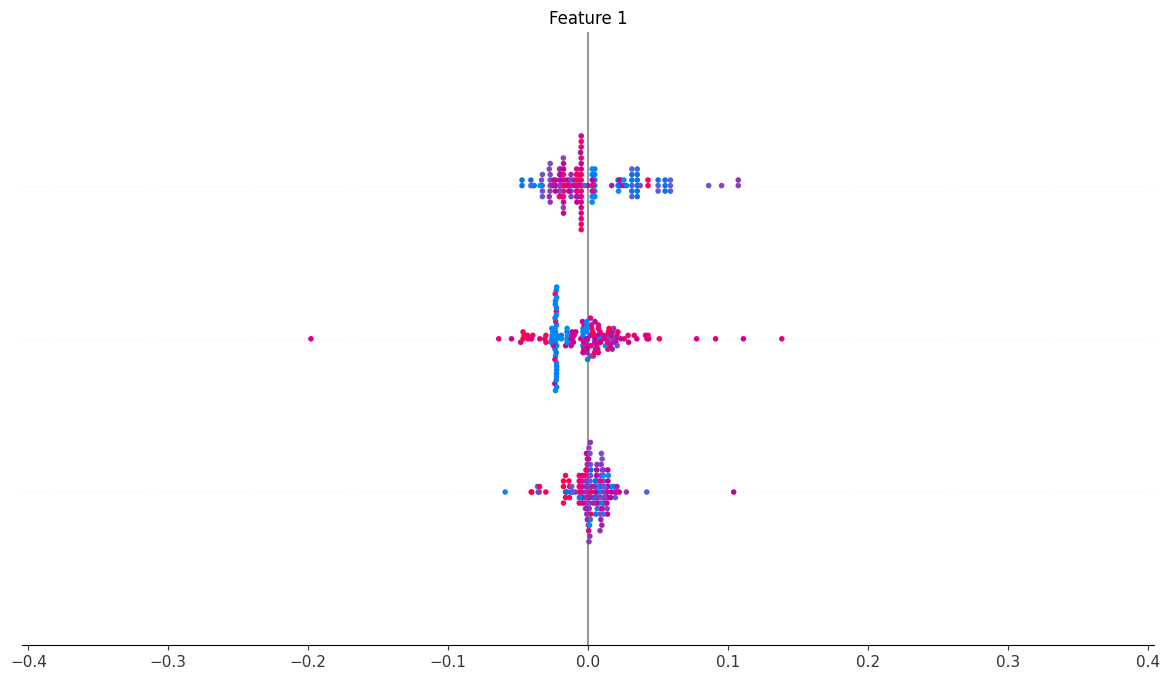

In [8]:
import shap

explainer = shap.TreeExplainer(model)  # Can be used for tree models, other explainers exist for different models
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


#### Permutation Feature Importance
Based on shuffling the feature and seeing how much the model's performance decreases.
Works for any model (black-box or interpretable).

In [9]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X, y, n_repeats=10, random_state=42)
print(results.importances_mean)


[0.012      0.01333333 0.24066667 0.19266667]


#### Recursive Feature Elimination (RFE)
Iteratively removes less important features based on model performance (e.g., using a model like SVM or Random Forest).

In [2]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

model = SVC(kernel="linear")
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)
print(rfe.support_)


[False False  True  True]


#### Mutual Information
Measures the dependency between each feature and the target using information theory.
Useful for both regression and classification.

In [3]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X, y)
print(importance)

[0.49673714 0.21616522 0.98593258 0.99083634]


#### Correlation-based Feature Importance
Evaluate feature importance by computing the correlation between each feature and the target.
Works for regression problems and provides an idea of linear relationships.

In [4]:
import numpy as np
corr = np.corrcoef(X, y, rowvar=False)
print(corr)


[[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]]


#### Coefficients in Linear Models
For linear models like Linear Regression or Logistic Regression, feature importance is directly reflected in the magnitude of the coefficients.
Larger absolute values mean higher importance.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print(model.coef_)


[-0.11190585 -0.04007949  0.22864503  0.60925205]
